<center>
<img src="../../../img/ods_stickers.jpg" />
    
[mlcourse.ai](https://mlcourse.ai) – Open Machine Learning Course 

Author: [Egor Polusmak](https://www.linkedin.com/in/egor-polusmak/). Translated and edited by Alena Sharlo, [Yury Kashnitsky](https://yorko.github.io), [Artem Trunov](https://www.linkedin.com/in/datamove), [Anastasia Manokhina](https://www.linkedin.com/in/anastasiamanokhina/), and [Yuanyuan Pao](https://www.linkedin.com/in/yuanyuanpao/). This material is subject to the terms and conditions of the [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/) license. Free use is permitted for any non-commercial purpose.

Topic 2. Visual data analysis in Python

## <center>Overview of seaborn, matplotlib, cufflinks and plotly libraries

### Article outline

1. [Dataset](#1.-Dataset)
2. [DataFrame.plot()](#2.-DataFrame.plot)
3. [Seaborn](#3.-Seaborn)
4. [Plotly](#4.-Plotly)
5. [Demo assignment](#5.-Demo-assignment)
6. [Useful resources](#6.-Useful-resources)

First, we will set up our environment by importing all necessary libraries. We will also change the display settings to better show plots.

In [2]:
# Matplotlib forms basis for visualization in Python
import matplotlib.pyplot as plt

# We will use the Seaborn library
import seaborn as sns
sns.set()

# Graphics in SVG format are more sharp and legible
%config InlineBackend.figure_format = 'svg' 

# Increase the default plot size and set the color scheme
plt.rcParams['figure.figsize'] = (8, 5)
plt.rcParams['image.cmap'] = 'viridis'
import pandas as pd

**Dataset**

Now, let’s load the dataset that we will be using into a `DataFrame`. I have picked a dataset on video game sales and ratings from [Kaggle Datasets](https://www.kaggle.com/rush4ratio/video-game-sales-with-ratings).
Some of the games in this dataset lack ratings; so, let’s filter for only those examples that have all of their values present.

In [3]:
df = pd.read_csv('../../../data/video_games_sales.csv')
df.shape
df.head()

(16719, 16)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
Name               16717 non-null object
Platform           16719 non-null object
Year_of_Release    16450 non-null float64
Genre              16717 non-null object
Publisher          16665 non-null object
NA_Sales           16719 non-null float64
EU_Sales           16719 non-null float64
JP_Sales           16719 non-null float64
Other_Sales        16719 non-null float64
Global_Sales       16719 non-null float64
Critic_Score       8137 non-null float64
Critic_Count       8137 non-null float64
User_Score         10015 non-null object
User_Count         7590 non-null float64
Developer          10096 non-null object
Rating             9950 non-null object
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [5]:
df = df.dropna()
df.shape

(6825, 16)

We see that `pandas` has loaded some of the numerical features as `object` type. We will explicitly convert those columns into `float` and `int`.

In [6]:
df['User_Score'] = df['User_Score'].astype('float64')
df['Year_of_Release'] = df['Year_of_Release'].astype('int64')
df['User_Count'] = df['User_Count'].astype('int64')
df['Critic_Count'] = df['Critic_Count'].astype('int64')

The resulting `DataFrame` contains 6825 examples and 16 columns. Let’s look at the first few entries with the `head()` method to check that everything has been parsed correctly. To make it more convenient, I have listed only the variables that we will use in this notebook.

In [7]:
useful_cols = ['Name', 'Platform', 'Year_of_Release', 'Genre', 
               'Global_Sales', 'Critic_Score', 'Critic_Count',
               'User_Score', 'User_Count', 'Rating'
              ]
df[useful_cols].head()

,Name,Platform,Year_of_Release,Genre,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,Wii Sports,Wii,2006,Sports,82.53,76.0,51,8.0,322,E
2,Mario Kart Wii,Wii,2008,Racing,35.52,82.0,73,8.3,709,E
3,Wii Sports Resort,Wii,2009,Sports,32.77,80.0,73,8.0,192,E
6,New Super Mario Bros.,DS,2006,Platform,29.80,89.0,65,8.5,431,E
7,Wii Play,Wii,2006,Misc,28.92,58.0,41,6.6,129,E


# `DataFrame.plot()`

Before we turn to Seaborn and Plotly, let’s discuss the simplest and often most convenient way to visualize data from a `DataFrame`: using its own `plot()` method.

As an example, we will create a plot of video game sales by country and year. First, let’s keep only the columns we need. Then, we will calculate the total sales by year and call the `plot()` method on the resulting `DataFrame`.

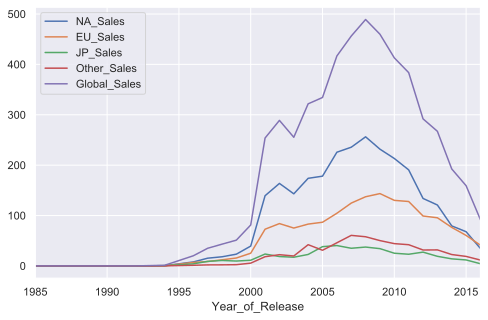

In [8]:
df[[x for x in df.columns if 'Sales' in x] + ['Year_of_Release']].groupby('Year_of_Release').sum().plot();

Note that the implementation of the `plot()` method in `pandas` is based on `matplotlib`.

Using the `kind` parameter, you can change the type of the plot to, for example, a *bar chart*. `matplotlib` is generally quite flexible for customizing plots. You can change almost everything in the chart, but you may need to dig into the [documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html) to find the corresponding parameters. For example, the parameter `rot` is responsible for the rotation angle of ticks on the x-axis (for vertical plots):

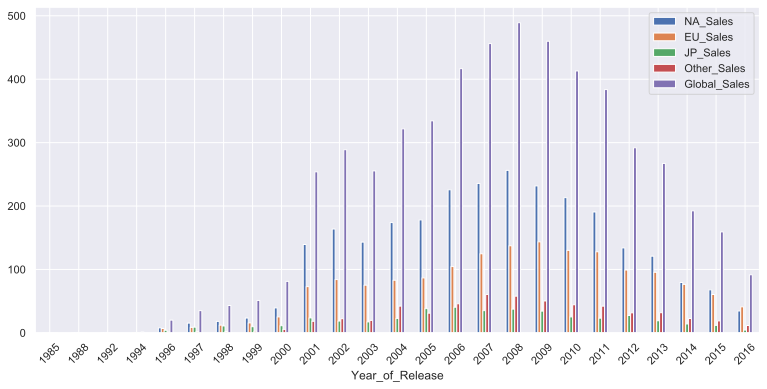

In [9]:
df[[x for x in df.columns if 'Sales' in x] + ['Year_of_Release']].groupby('Year_of_Release').sum().plot(kind='bar', rot=45, figsize=(13, 6));

# Seaborn

Now, let's move on to the `Seaborn` library. `seaborn` is essentially a higher-level API based on the `matplotlib` library. Among other things, it differs from the latter in that it contains more adequate default settings for plotting. By adding `import seaborn as sns; sns.set()` in your code, the images of your plots will become much nicer. Also, this library contains a set of complex tools for visualization that would otherwise (i.e. when using bare `matplotlib`) require quite a large amount of code.

## `pairplot()`
Let's take a look at the first of such complex plots, a *pairwise relationships plot*, which creates a matrix of scatter plots by default. This kind of plot helps us visualize the relationship between different variables in a single output.

该函数比较费时。

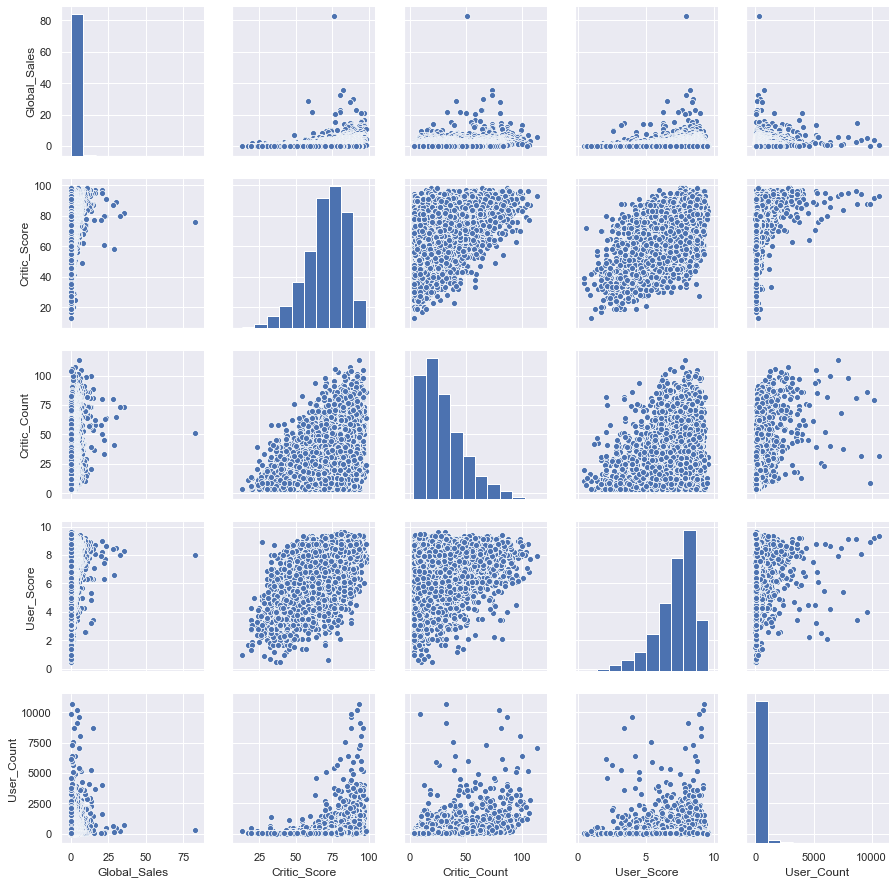

In [14]:
# `pairplot()` may become very slow with the SVG format
%config InlineBackend.figure_format = 'png' 

sns.pairplot(df[['Global_Sales', 'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count']]);

As you can see, the distribution histograms lie on the diagonal of the matrix. The remaining charts are scatter plots for the corresponding pairs of features.

## distplot()

It is also possible to plot a distribution of observations with `seaborn`'s `distplot()`. For example, let's look at the distribution of critics' ratings: `Critic_Score`. By default, the plot displays a histogram and the [kernel density estimate](https://en.wikipedia.org/wiki/Kernel_density_estimation).

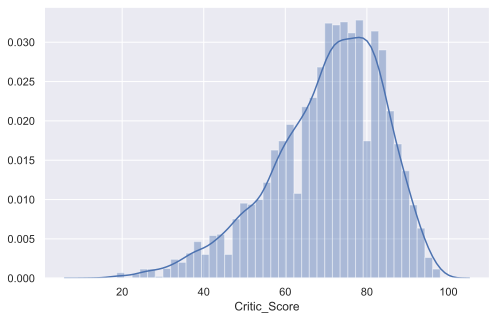

In [15]:
%config InlineBackend.figure_format = 'svg'

sns.distplot(df['Critic_Score']);

## `jointplot()`

To look more closely at the relationship between two numerical variables, you can use *joint plot*, which is a cross between a scatter plot and histogram. Let's see how the `Critic_Score` and `User_Score` features are related.

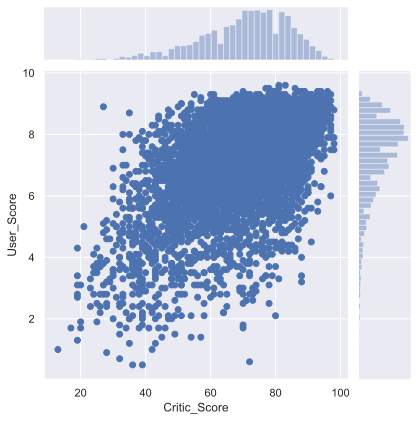

In [16]:
sns.jointplot(x='Critic_Score', y='User_Score', data=df, kind='scatter');

## `boxplot()`

Another useful type of plot is a *box plot*. Let's compare critics' ratings for the top 5 biggest gaming platforms.

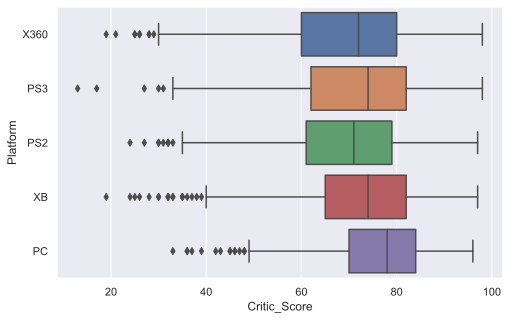

In [17]:
top_platforms = df['Platform'].value_counts().sort_values(ascending=False).head(5).index.values

sns.boxplot(y="Platform", x="Critic_Score", data=df[df['Platform'].isin(top_platforms)]);

It is worth spending a bit more time to discuss how to interpret a box plot. Its components are a *box* (obviously, this is why it is called a *box plot*), the so-called *whiskers*（须）, and a number of individual points (*outliers*).

The box by itself illustrates the interquartile spread of the distribution; its length determined by the $25\% \, (\text{Q1})$ and $75\% \, (\text{Q3})$ percentiles. The vertical line inside the box marks the median ($50\%$) of the distribution. 

The whiskers are the lines extending from the box. They represent the entire scatter of data points, specifically the points that fall within the interval $(\text{Q1} - 1.5 \cdot \text{IQR}, \text{Q3} + 1.5 \cdot \text{IQR})$, where $\text{IQR} = \text{Q3} - \text{Q1}$ is the [interquartile range](https://en.wikipedia.org/wiki/Interquartile_range).

Outliers that fall out of the range bounded by the whiskers are plotted individually.

注意：箱型图两边的触须通常是不等长的，触须延长到的最远位置是位于$(\text{Q1} - 1.5 \cdot \text{IQR}, \text{Q3} + 1.5 \cdot \text{IQR})$内的数据点的边界，而不是这两个值本身。

## `heatmap()`

The last type of plot that we will cover here is a *heat map*. A heat map allows you to view the distribution of a numerical variable over two categorical ones. Let’s visualize the total sales of games by genre and gaming platform.

In [13]:
sns.heatmap?

Signature:
sns.heatmap(
    data,
    vmin=None,
    vmax=None,
    cmap=None,
    center=None,
    robust=False,
    annot=None,
    fmt='.2g',
    annot_kws=None,
    linewidths=0,
    linecolor='white',
    cbar=True,
    cbar_kws=None,
    cbar_ax=None,
    square=False,
    xticklabels='auto',
    yticklabels='auto',
    mask=None,
    ax=None,
    **kwargs,
)
Docstring:
Plot rectangular data as a color-encoded matrix.

This is an Axes-level function and will draw the heatmap into the
currently-active Axes if none is provided to the ``ax`` argument.  Part of
this Axes space will be taken and used to plot a colormap, unless ``cbar``
is False or a separate Axes is provided to ``cbar_ax``.

Parameters
----------
data : rectangular dataset
    2D dataset that can be coerced into an ndarray. If a Pandas DataFrame
    is provided, the index/column information will be used to label the
    columns and rows.
vmin, vmax : floats, optional
    Values to anchor the colormap, otherwise they a

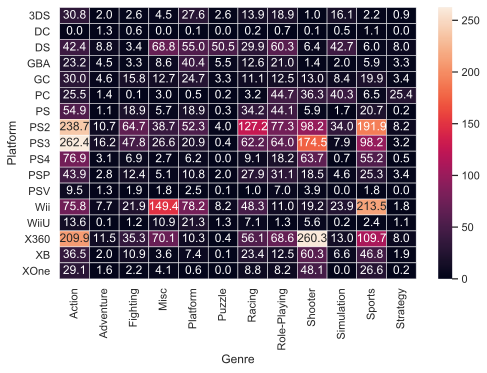

In [18]:
platform_genre_sales = df.pivot_table(
                        index='Platform', 
                        columns='Genre', 
                        values='Global_Sales', 
                        aggfunc=sum).fillna(0).applymap(float)

sns.heatmap(platform_genre_sales, annot=True, fmt=".1f", linewidths=.5);

# Plotly

We have examined some visualization tools based on the `matplotlib` library. However, this is not the only option for plotting in `Python`. Let’s take a look at the `plotly` library. Plotly is an open-source library that allows creation of **interactive** plots within a Jupyter notebook without having to use Javascript.

The real beauty of interactive plots is that they provide a user interface for detailed data exploration. For example, you can
1. see exact numerical values by mousing over points, 
2. hide uninteresting series from the visualization, 
3. zoom in onto a specific part of the plot, etc.

Before we start, let’s import all the necessary modules and initialize `plotly` by calling the `init_notebook_mode()` function.

In [19]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly
import plotly.graph_objs as go

init_notebook_mode(connected=True)

`iplot`直接在jupyter notebook里面显示图表。`plot`用于生成离线的html文件。

`iplot`在jupyter notebook中使用良好，但是直接在jupyter lab中使用总是显示不出来图表。可以通过安装扩展来解决：[github > plotly](https://github.com/plotly/plotly.py#jupyterlab-support-python-35)

In [16]:
?iplot

Signature:
iplot(
    figure_or_data,
    show_link=False,
    link_text='Export to plot.ly',
    validate=True,
    image=None,
    filename='plot_image',
    image_width=800,
    image_height=600,
    config=None,
    auto_play=True,
    animation_opts=None,
)
Docstring:
Draw plotly graphs inside an IPython or Jupyter notebook

figure_or_data -- a plotly.graph_objs.Figure or plotly.graph_objs.Data or
                  dict or list that describes a Plotly graph.
                  See https://plot.ly/python/ for examples of
                  graph descriptions.

Keyword arguments:
show_link (default=False) -- display a link in the bottom-right corner of
                            of the chart that will export the chart to
                            Plotly Cloud or Plotly Enterprise
link_text (default='Export to plot.ly') -- the text of export link
validate (default=True) -- validate that all of the keys in the figure
                           are valid? omit if your version of plotl

In [17]:
?plot

Signature:
plot(
    figure_or_data,
    show_link=False,
    link_text='Export to plot.ly',
    validate=True,
    output_type='file',
    include_plotlyjs=True,
    filename='temp-plot.html',
    auto_open=True,
    image=None,
    image_filename='plot_image',
    image_width=800,
    image_height=600,
    config=None,
    include_mathjax=False,
    auto_play=True,
    animation_opts=None,
)
Docstring:
Create a plotly graph locally as an HTML document or string.

Example:
```
from plotly.offline import plot
import plotly.graph_objs as go

plot([go.Scatter(x=[1, 2, 3], y=[3, 2, 6])], filename='my-graph.html')
# We can also download an image of the plot by setting the image parameter
# to the image format we want
plot([go.Scatter(x=[1, 2, 3], y=[3, 2, 6])], filename='my-graph.html',
     image='jpeg')
```
More examples below.

figure_or_data -- a plotly.graph_objs.Figure or plotly.graph_objs.Data or
                  dict or list that describes a Plotly graph.
                  See htt

## Line/Scatter

First of all, let’s build a *line plot* showing the number of games released and their sales by year.

In [20]:
years_df = df.groupby(['Year_of_Release']).agg({'Global_Sales': sum, 'Name': len}).rename(columns={'Name': 'Number_of_Games'})

In [21]:
years_df.head()

,Global_Sales,Number_of_Games
Year_of_Release,,
1985,0.03,1
1988,0.03,1
1992,0.03,1
1994,1.27,1
1996,20.10,7


`Figure` is the main class and a work horse（work horse，广为应用的工具） of visualization in `plotly`. It consists of the data (an array of lines called `traces` in this library) and the style (represented by the `layout` object). In the simplest case, you may call the `iplot` function to return only `traces`.

The `show_link` parameter toggles the visibility of the links leading to the online platform `plot.ly` in your charts. Most of the time, this functionality is not needed, so you may want to turn it off by passing `show_link=False` to prevent accidental clicks on those links.

`Scatter`默认绘制折线图，指定参数`mode`为`markers`可以绘制散点图。

In [58]:
# Create a line (trace) for the global sales
trace0 = go.Scatter(
    x=years_df.index,
    y=years_df['Global_Sales'],
    name='Global Sales'
)

# Create a line (trace) for the number of games released
trace1 = go.Scatter(
    x=years_df.index,
    y=years_df['Number_of_Games'],
    name='Number of games released',
    mode='markers'
)

# Define the data array
data = [trace0, trace1]

In [23]:
layout = {'title': 'Statistics for video games'}  # go.Layout

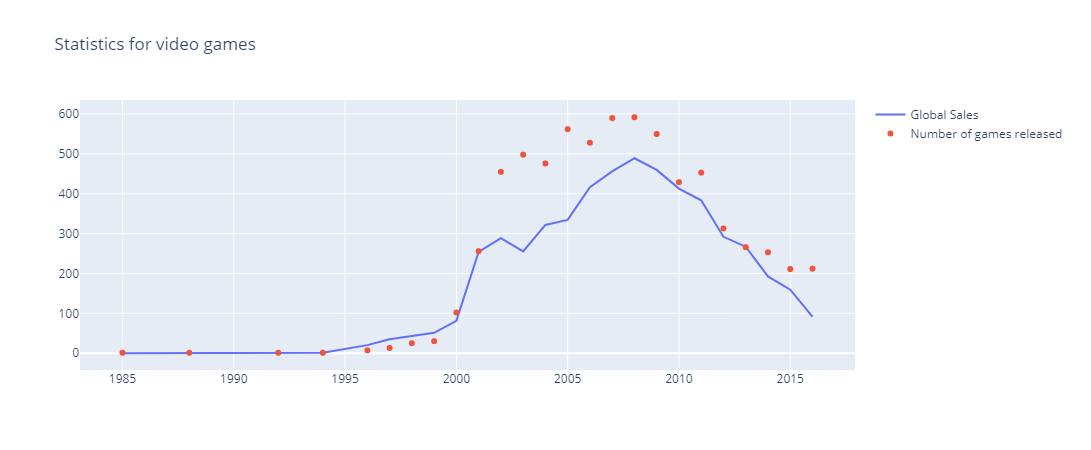

In [24]:
# Create a Figure and plot it
fig = go.Figure(data=data, layout=layout)
iplot(fig, show_link=False)

In [31]:
plot(fig, filename='htmls/years_stats.html', show_link=False);

## Bar chart

Let's use a *bar chart* to compare the market share of different gaming platforms broken down by the number of new releases and by total revenue.

In [25]:
platforms_df = df.groupby(['Platform']) \
                    .agg({'Global_Sales': sum, 'Name': len}) \
                    .rename(columns={'Name': 'Number_of_Games'}) \
                    .sort_values('Global_Sales',ascending=False)

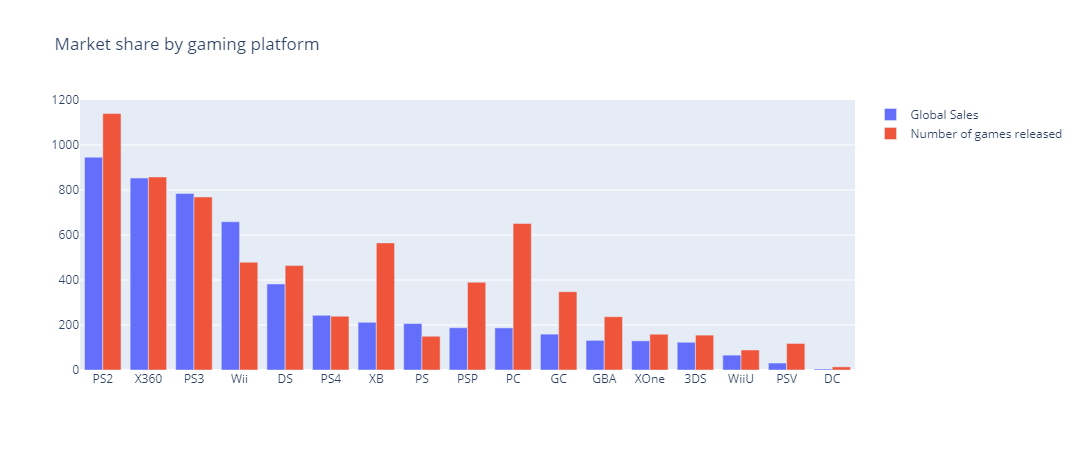

In [26]:
# Create a bar for the global sales
trace0 = go.Bar(
    x=platforms_df.index,
    y=platforms_df['Global_Sales'],
    name='Global Sales'
)

# Create a bar for the number of games released
trace1 = go.Bar(
    x=platforms_df.index,
    y=platforms_df['Number_of_Games'],
    name='Number of games released'
)

# Get together the data and style objects
data = [trace0, trace1]
layout = {'title': 'Market share by gaming platform'}

# Create a `Figure` and plot it
fig = go.Figure(data=data, layout=layout)
iplot(fig, show_link=False)

## Box plot

`plotly` also supports *box plots*. Let’s consider the distribution of critics' ratings by the genre of the game.

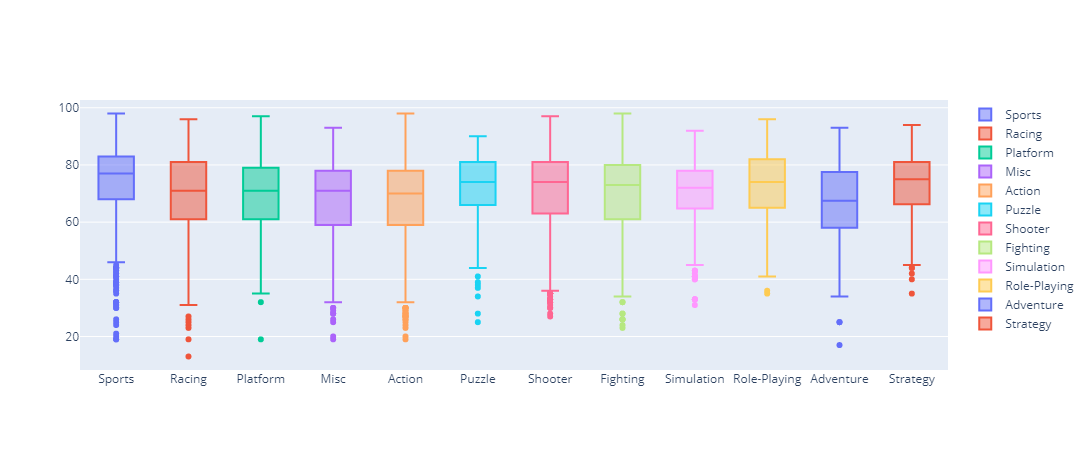

In [27]:
data = []

# Create a box trace for each genre in our dataset
for genre in df.Genre.unique():
    data.append(
        go.Box(y=df[df.Genre == genre].Critic_Score, name=genre)
    )
    
# Visualize
iplot(data, show_link=False)

Using `plotly`, you can also create other types of visualization. Even with default settings, the plots look quite nice. Additionally, the library makes it easy to modify various parameters: colors, fonts, captions, annotations, and so on.

# cufflinks
类似于`seaborn`是`matplotlib`的更高层级的封装，`cufflinks`也是在`plotly`的基础上做了进一步的包装，This library binds the power of `plotly` with the flexibility of `pandas` for easy plotting. 直接使用`plotly`作图，代码比较臃肿，`cufflinks`对其进行封装，使得使用`pd.DataFrame`类型的数据作图时代码非常简洁。

In [73]:
import cufflinks as cf
cf.set_config_file(offline=True, offline_show_link=False)

In [74]:
cf.help()  # 并没有写全图表，比如ta_plot时序分析图下面就没提

Use 'cufflinks.help(figure)' to see the list of available parameters for the given figure.
Use 'DataFrame.iplot(kind=figure)' to plot the respective figure
Figures:
	bar
	box
	bubble
	bubble3d
	candle
	choroplet
	distplot
	heatmap
	histogram
	ohlc
	pie
	ratio
	scatter
	scatter3d
	scattergeo
	spread
	surface
	violin


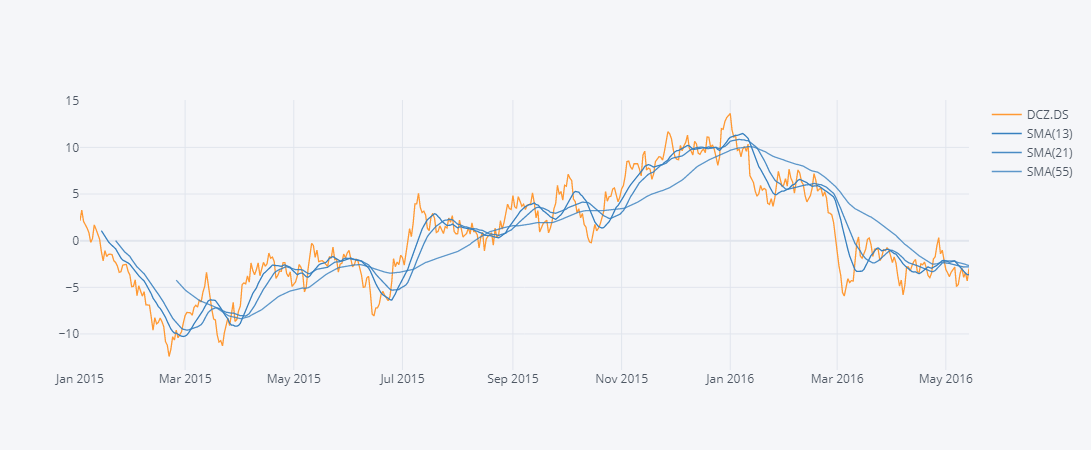

In [75]:
cf.datagen.lines(1,500).ta_plot(study='sma',period=[13,21,55])

## Scatter

In [41]:
cf.help('scatter')

SCATTER
Scatter plot
2D chart based in an x and y axis.
Can be a line chart (default) or a set of scatter points (markers)


Parameters:
    bestfit : bool or list
        Displays a best fit line
        If list, then a best fit line will be generated
        for each trace key in the list
    bestfit_colors : dict or list
        Sets the color for each best fit line
        	{key:color} to set the color for each trace
        	[color1, color2...] to set the colors in the specified order
    categories : string
        Name of the column that contains the categories
    connectgaps : bool
        If True, then empty values are connected
    dash : string, list or dict
        Line style
        	string : applies to all traces
        	list : applies to each trace in the order specified
        	dict : {column:value} for each column in the dataframe
        values    :
        	solid
        	dash
        	dashdot
        	dot
    fill : bool
        Fills the trace (area)
    interpo

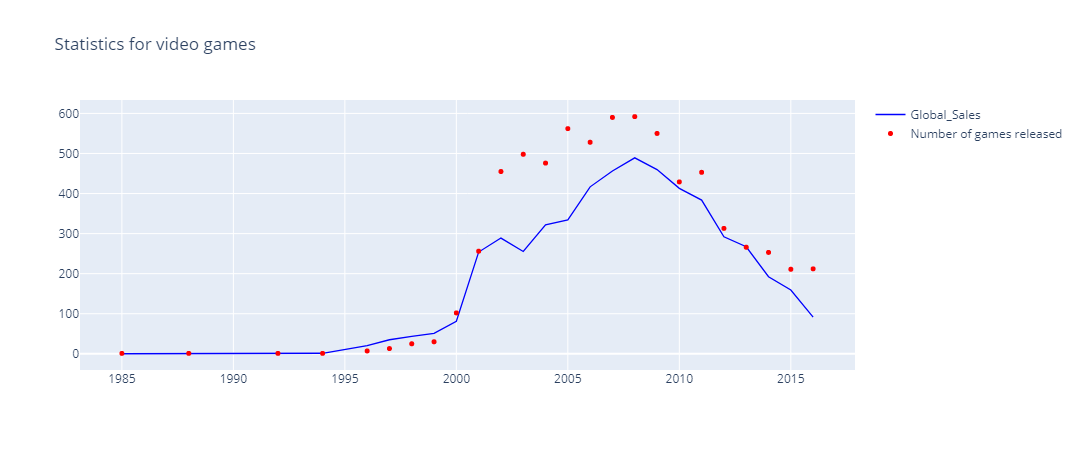

In [77]:
years_df.rename(columns={'Global_Sales': 'Global_Sales',
                         'Number_of_Games': 'Number of games released'})\
        .iplot(kind='scatter', 
               mode={'Global_Sales': 'lines',
                     'Number of games released': 'markers'},
               size=5,
               colors={'Global_Sales': 'blue',
                       'Number of games released': 'red'},
               layout={'title': 'Statistics for video games'})

## Bar chart

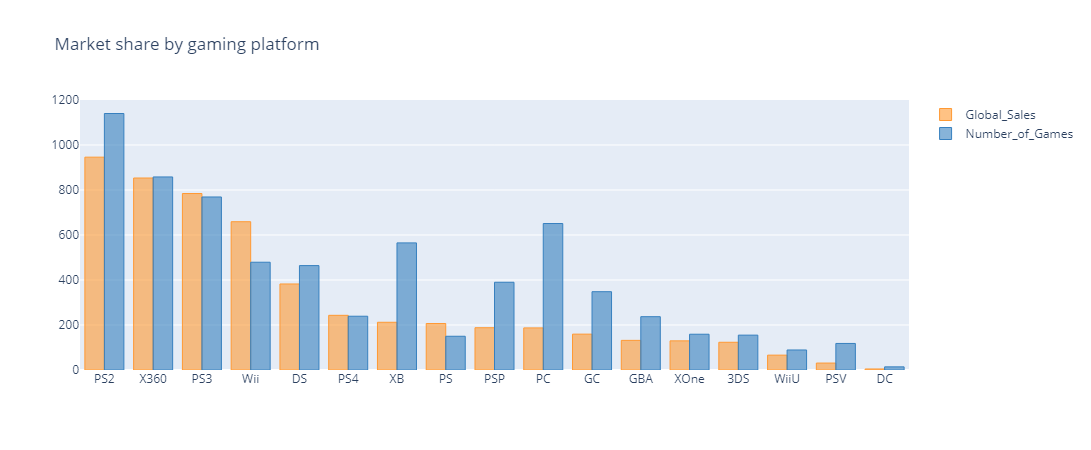

In [79]:
platforms_df.iplot(kind='bar', layout={'title': 'Market share by gaming platform'})

# Demo assignment
To practice with visual data analysis, you can complete [this assignment](https://www.kaggle.com/kashnitsky/a2-demo-analyzing-cardiovascular-data) where you'll be analyzing cardiovascular disease data.

# Useful resources
- The same notebook as an interactive web-based [Kaggle Kernel](https://www.kaggle.com/kashnitsky/topic-2-part-2-seaborn-and-plotly)
- ["Plotly for interactive plots"](https://nbviewer.jupyter.org/github/Yorko/mlcourse.ai/blob/master/jupyter_english/tutorials/plotly_tutorial_for_interactive_plots_sankovalev.ipynb) - a tutorial by Alexander Kovalev within mlcourse.ai (full list of tutorials is [here](https://mlcourse.ai/tutorials))
- ["Bring your plots to life with Matplotlib animations"](https://nbviewer.jupyter.org/github/Yorko/mlcourse.ai/blob/master/jupyter_english/tutorials/bring_your_plots_to_life_with_matplotlib_animations_kyriacos_kyriacou.ipynb) - a tutorial by Kyriacos Kyriacou within mlcourse.ai
- ["Some details on Matplotlib"](https://nbviewer.jupyter.org/github/Yorko/mlcourse.ai/blob/master/jupyter_english/tutorials/some_details_in_matplotlib_pisarev_ivan.ipynb) - a tutorial by Ivan Pisarev within mlcourse.ai
- Main course [site](https://mlcourse.ai), [course repo](https://github.com/Yorko/mlcourse.ai), and YouTube [channel](https://www.youtube.com/watch?v=QKTuw4PNOsU&list=PLVlY_7IJCMJeRfZ68eVfEcu-UcN9BbwiX)
- Medium ["story"](https://medium.com/open-machine-learning-course/open-machine-learning-course-topic-2-visual-data-analysis-in-python-846b989675cd) based on this notebook
- Course materials as a [Kaggle Dataset](https://www.kaggle.com/kashnitsky/mlcourse)
- If you read Russian: an [article](https://habrahabr.ru/company/ods/blog/323210/) on Habrahabr with ~ the same material. And a [lecture](https://youtu.be/vm63p8Od0bM) on YouTube
- Here is the official documentation for the libraries we used: [`matplotlib`](https://matplotlib.org/contents.html), [`seaborn`](https://seaborn.pydata.org/introduction.html) and [`pandas`](https://pandas.pydata.org/pandas-docs/stable/).
- The [gallery](http://seaborn.pydata.org/examples/index.html) of sample charts created with `seaborn` is a very good resource.
- Also, see the [documentation](http://scikit-learn.org/stable/modules/manifold.html) on Manifold Learning in `scikit-learn`.
- Efficient t-SNE implementation [Multicore-TSNE](https://github.com/DmitryUlyanov/Multicore-TSNE).
- "How to Use t-SNE Effectively", [Distill.pub](https://distill.pub/2016/misread-tsne/).